In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [3]:
#读取csv数据
df = pd.read_csv('../data/credit.csv')
#展示前五行数据
df.head()

,income,house,points,default,numbers,credit
0,5472,3,10,0,7,3
1,7452,3,10,0,8,3
2,5312,3,10,0,7,3
3,6568,3,10,0,8,3
4,6340,3,20,0,9,3


Text(0, 0.5, 'points')

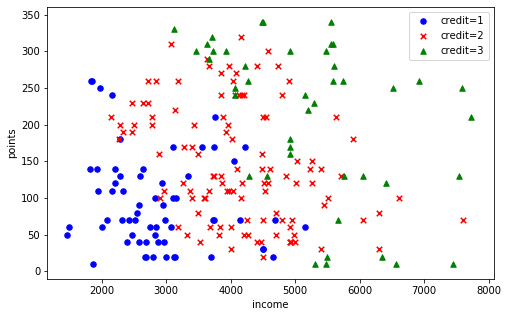

In [4]:
#对训练集中的数据进行可视化
a1 = df[df['credit'] == 1] # 把credit为1的数据筛选出来形成单独的数据集
a2 = df[df['credit'] == 2] # 把credit为2的数据筛选出来形成单独的数据集  
a3 = df[df['credit'] == 3] # 把credit为3的数据筛选出来形成单独的数据集

#创建子图，大小为8*5
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(a1['income'], a1['points'], s=30, c='b', marker='o', label='credit=1')
#构建a1的散点图，设置散点形状为o
ax.scatter(a2['income'], a2['points'], s=30, c='r', marker='x', label='credit=2')  
#构建a2的散点图，设置散点形状为x
ax.scatter(a3['income'], a3['points'], s=30, c='g', marker='^', label='credit=3')  
#构建a3的散点图，设置散点形状为x
ax.legend()  #设置图例
ax.set_xlabel('income')  #设置x轴标签
ax.set_ylabel('points')  #设置y轴标签

Text(0, 0.5, 'default')

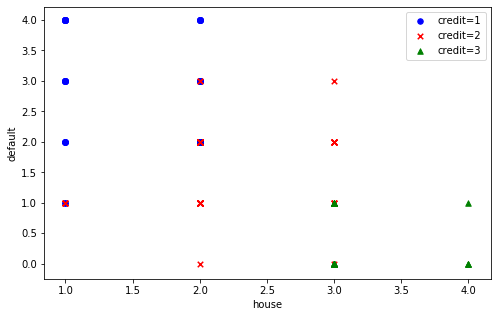

In [5]:
#创建子图，大小为8*5
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(a1['house'], a1['default'], s=30, c='b', marker='o', label='credit=1')
#构建a1的散点图，设置散点形状为o
ax.scatter(a2['house'], a2['default'], s=30, c='r', marker='x', label='credit=2')  
#构建a2的散点图，设置散点形状为x
ax.scatter(a3['house'], a3['default'], s=30, c='g', marker='^', label='credit=3')  
#构建a3的散点图，设置散点形状为x
ax.legend(loc='upper right')  #设置图例
ax.set_xlabel('house')  #设置x轴标签
ax.set_ylabel('default')  #设置y轴标签

Text(0, 0.5, 'numbers')

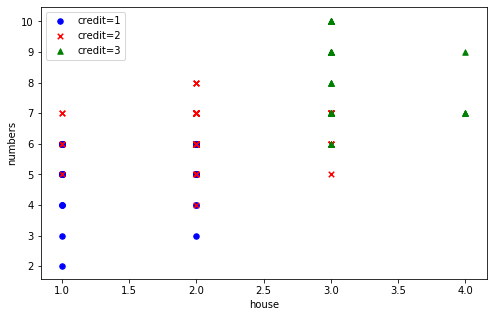

In [6]:
#创建子图，大小为8*5
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(a1['house'], a1['numbers'], s=30, c='b', marker='o', label='credit=1')
#构建a1的散点图，设置散点形状为o
ax.scatter(a2['house'], a2['numbers'], s=30, c='r', marker='x', label='credit=2')  
#构建a2的散点图，设置散点形状为x
ax.scatter(a3['house'], a3['numbers'], s=30, c='g', marker='^', label='credit=3')  
#构建a3的散点图，设置散点形状为x
ax.legend(loc='upper left')  #设置图例
ax.set_xlabel('house')  #设置x轴标签
ax.set_ylabel('numbers')  #设置y轴标签

In [7]:
X = df.iloc[:,1:6]  #取df的后3列为X变量
y = df['credit'] #设置y变量

# 把X、y转化为数组形式，以便于计算
X = np.array(X.values)  
y = np.array(y.values)

In [8]:
len(y)

219

In [9]:
#以25%的数据构建测试样本，剩余作为训练样本
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state =1)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 5), (55, 5), (164,), (55,))

In [11]:
GNB = GaussianNB()  #设定模型为高斯朴素贝叶斯
GNB.fit(X_train, y_train) #训练数据

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
#print(GNB.set_params(priors=[0.625,0.375]))#设置priors参数值
#print(GNB.priors)#获取各个类标记对应的先验概率
print(GNB.class_prior_)#获取各个类标记对应的先验概率
print(GNB.class_count_)#获取各类标记对应的训练样本数
print(GNB.theta_)#获取各类标记在各个特征值上的均值
print(GNB.sigma_)#获取各个类标记在各个特征上的方差

[0.25609756 0.54878049 0.19512195]
[42. 90. 32.]
[[1.50000000e+00 9.33333333e+01 3.14285714e+00 5.33333333e+00
  1.00000000e+00]
 [2.13333333e+00 1.44222222e+02 1.58888889e+00 6.56666667e+00
  2.00000000e+00]
 [3.06250000e+00 2.19062500e+02 1.87500000e-01 7.90625000e+00
  3.00000000e+00]]
[[2.50008540e-01 4.97460318e+03 5.51028948e-01 9.36516477e-01
  8.54022531e-06]
 [2.26675207e-01 6.18439507e+03 3.53218417e-01 4.67786318e-01
  8.54022531e-06]
 [5.86022902e-02 1.08584961e+04 1.52352290e-01 1.45996948e+00
  8.54022531e-06]]


In [13]:
y_pred = GNB.predict(X_test)

y_pred

array([1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 2, 2,
       2, 2, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 3,
       2, 1, 2, 3, 2, 1, 2, 3, 3, 2, 2], dtype=int64)

In [14]:
accuracy_score(y_test, y_pred)  #计算准确率

1.0

In [15]:
confusion_matrix(y_true=y_test, y_pred=y_pred)  #计算混淆矩阵

array([[21,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 12]], dtype=int64)

In [16]:
clf=LogisticRegression(max_iter=10000)  #设置算法为逻辑回归
clf.fit(X_train, y_train)  #训练数据

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred_classifier = clf.predict(X_test)  #预测测试集

accuracy_score(y_test, y_pred_classifier)  #计算准确率

1.0

In [18]:
confusion_matrix(y_true=y_test, y_pred=y_pred_classifier)   #计算混淆矩阵

array([[21,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 12]], dtype=int64)

In [19]:
MNB = MultinomialNB(alpha=1.0)   #设置算法为多项式朴素贝叶斯
MNB.fit(X_train, y_train)  #训练数据

print(MNB.class_log_prior_)  #各类标记的平滑先验概率对数值
print(MNB.intercept_) #将多项式朴素贝叶斯解释的class_log_prior_映射为线性模型，其值和class_log_prior相同

[-1.36219681 -0.60005676 -1.63413053]
[-1.36219681 -0.60005676 -1.63413053]


In [20]:
y_pred_MNB = MNB.predict(X_test)   #预测测试集
accuracy_score(y_test, y_pred_MNB)  #计算准确率

0.7454545454545455

In [21]:
confusion_matrix(y_true=y_test, y_pred=y_pred_MNB)   #计算混淆矩阵

array([[14,  7,  0],
       [ 3, 19,  0],
       [ 0,  4,  8]], dtype=int64)

In [22]:
BNB = BernoulliNB(alpha=1.0,binarize = 2.0,fit_prior=True)  #设置算法为伯努利朴素贝叶斯
BNB.fit(X_train, y_train)   #训练数据

BernoulliNB(alpha=1.0, binarize=2.0, class_prior=None, fit_prior=True)

In [23]:
#类先验概率对数值，类先验概率等于各类的个数/类的总个数
print(BNB.class_log_prior_)  
#指定类的各特征概率(条件概率)对数值，返回形状为(n_classes, n_features)数组
print(BNB.feature_log_prob_)

[-1.36219681 -0.60005676 -1.63413053]
[[-3.78418963 -0.02298952 -0.25782911 -0.04652002 -3.78418963]
 [-1.63141682 -0.01092907 -3.13549422 -0.01092907 -4.52178858]
 [-0.02985296 -0.02985296 -3.52636052 -0.02985296 -0.02985296]]


In [24]:
y_pred_BNB = BNB.predict(X_test)  #预测测试集
accuracy_score(y_test, y_pred_BNB)  #计算准确率

0.8727272727272727

In [25]:
confusion_matrix(y_true=y_test, y_pred=y_pred_BNB)   #计算混淆矩阵

array([[14,  7,  0],
       [ 0, 22,  0],
       [ 0,  0, 12]], dtype=int64)